In [1]:
# Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Location of the study's Data Files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Reads both the Mouse Data and Study Results data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Before combining data, Checking both csv files for common columns of data to merge via
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combined both csv files into one dataframe
mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Found duplicate Mouse IDs and deleted any data associated with those IDs

mouse_study_merged = mouse_study_merged.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Generates a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sst_df = pd.DataFrame()

sst_df["Mean"] = mouse_study_merged.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
sst_df["Median"] = mouse_study_merged.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
sst_df["Variance"] = mouse_study_merged.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
sst_df["Standard Deviation"] = mouse_study_merged.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
sst_df["SEM"] = mouse_study_merged.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

sst_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Mice Tested')

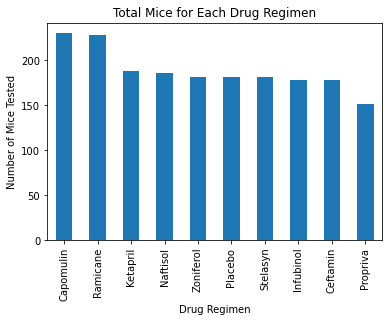

In [7]:
# Generates a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_num = mouse_study_merged["Drug Regimen"].value_counts()
mice_dict = mice_num.to_dict()
regimen = mice_dict.keys()
y_mice = mice_dict.values()
x_mice = np.arange(len(y_mice))
tick_locations = [value for value in x_mice]
mouse_bar = pd.DataFrame()
mouse_bar['Drug Regimen'] = regimen
mouse_bar['Number of Mice'] = y_mice

mouse_bar.plot(x = 'Drug Regimen', y = 'Number of Mice', kind = 'bar', align="center",
              title = 'Total Mice for Each Drug Regimen', legend = False)
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

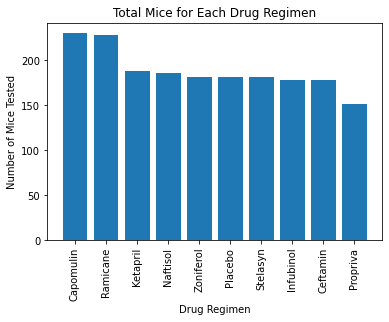

In [8]:
# Generates a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(x_mice, y_mice, align="center")
plt.xticks(tick_locations, regimen, rotation="vertical")

plt.title("Total Mice for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

Text(0, 0.5, 'Mice Sex Distribution')

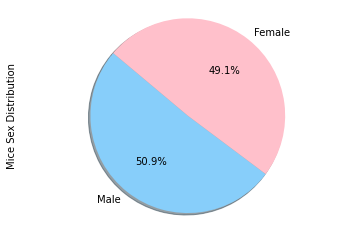

In [9]:
# Generates a pie plot showing the distribution of female versus male mice using pandas
mice_sex_groups = mouse_study_merged["Sex"].value_counts()
mice_sex_dict = mice_sex_groups.to_dict()
sex_type = mice_sex_dict.keys()
sex_num = mice_sex_dict.values()
colors = ["lightskyblue", "pink"]
mice_sex_df = pd.DataFrame()
mice_sex_df['Sex'] = sex_type
mice_sex_df['Number of Mice'] = sex_num
mice_sex_df.plot(x = 'Sex', y = 'Number of Mice', kind = 'pie', legend = False,
                labels=sex_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.ylabel("Mice Sex Distribution")

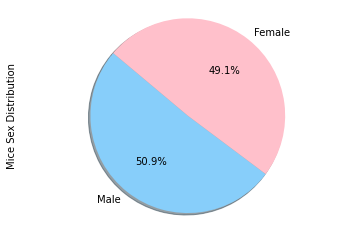

In [10]:
# Generates a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_num, labels=sex_type, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.ylabel("Mice Sex Distribution")
plt.show()

In [11]:
# Calculates the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Starts by getting the last (greatest) timepoint for each mouse and creating a dataframe with it
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_vol_df = mouse_study_merged.loc[mouse_study_merged["Drug Regimen"].isin(treatments), [
    "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor_vol_df = final_tumor_vol_df.drop_duplicates(subset=["Mouse ID"],keep='last')
final_tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
9,k403,45,22.050126
19,s185,45,23.343598
29,x401,45,28.484033
39,m601,45,28.430964
49,g791,45,29.128472
...,...,...,...
1797,x822,45,61.386660
1813,y163,45,67.685569
1845,y769,45,68.594745
1855,y865,45,64.729837


In [12]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
first_n_final_tumor = pd.merge(mouse_study_merged, final_tumor_vol_df, on="Mouse ID")
first_n_final_tumor = first_n_final_tumor.loc[first_n_final_tumor["Timepoint_x"] == 0]
first_n_final_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,0,45.0,0,45,22.050126
10,s185,Capomulin,Female,3,17,0,45.0,0,45,23.343598
20,x401,Capomulin,Female,16,15,0,45.0,0,45,28.484033
30,m601,Capomulin,Male,22,17,0,45.0,0,45,28.430964
40,g791,Ramicane,Male,11,16,0,45.0,0,45,29.128472
...,...,...,...,...,...,...,...,...,...,...
764,x822,Ceftamin,Male,3,29,0,45.0,0,45,61.386660
774,y163,Infubinol,Female,17,27,0,45.0,0,45,67.685569
784,y769,Ceftamin,Female,6,27,0,45.0,0,45,68.594745
794,y865,Ceftamin,Male,23,26,0,45.0,0,45,64.729837


In [13]:
# Separated large dataframe into four dataframes, one for each treatment regimen
capomulin_final = first_n_final_tumor.loc[first_n_final_tumor["Drug Regimen"] == 'Capomulin']
ramicane_final = first_n_final_tumor.loc[first_n_final_tumor["Drug Regimen"] == 'Ramicane']
infubinol_final = first_n_final_tumor.loc[first_n_final_tumor["Drug Regimen"] == 'Infubinol']
ceftamin_final = first_n_final_tumor.loc[first_n_final_tumor["Drug Regimen"] == 'Ceftamin']

# Pulled final tumor volumes from each treatment and converted them in their own lists
capomulin_pts = capomulin_final["Tumor Volume (mm3)_y"]
ramicane_pts = ramicane_final["Tumor Volume (mm3)_y"]
infubinol_pts = infubinol_final["Tumor Volume (mm3)_y"]
ceftamin_pts = ceftamin_final["Tumor Volume (mm3)_y"]

In [14]:
# Calculates Quartiles, IQR, Outlier boundaries, All potential outliers for each treatment regimen
tumor_lists = {'Capomulin': capomulin_pts, 'Ramicane': ramicane_pts, 
               'Infubinol': infubinol_pts, 'Ceftamin': ceftamin_pts}
for key, value in tumor_lists.items():
    quartiles = value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{key} Quartiles- Lower:{lowerq}, Upper:{upperq}")
    print(f"{key} IQR: {iqr}")
    print(f"{key} Lower Boundary: {lower_bound}, Upper Boundary: {upper_bound}")
    
    for v in value:
        if v > upper_bound:
            print(f"{v} is a potential {key} outlier.")
        elif v < lower_bound:
            print(f"{v} is a potential {key} outlier.")
    

Capomulin Quartiles- Lower:32.37735684, Upper:40.1592203
Capomulin IQR: 7.781863460000004
Capomulin Lower Boundary: 20.70456164999999, Upper Boundary: 51.83201549
Ramicane Quartiles- Lower:31.56046955, Upper:40.65900627
Ramicane IQR: 9.098536719999998
Ramicane Lower Boundary: 17.912664470000003, Upper Boundary: 54.30681135
Infubinol Quartiles- Lower:54.04860769, Upper:65.52574285
Infubinol IQR: 11.477135160000003
Infubinol Lower Boundary: 36.83290494999999, Upper Boundary: 82.74144559000001
36.321345799999996 is a potential Infubinol outlier.
Ceftamin Quartiles- Lower:48.72207785, Upper:64.29983003
Ceftamin IQR: 15.577752179999997
Ceftamin Lower Boundary: 25.355449580000002, Upper Boundary: 87.66645829999999


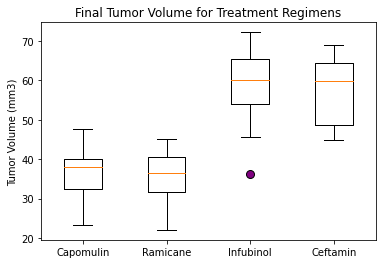

In [15]:
# Creates a boxplot of the final tumor volume of each mouse using all four lists of treatment data, highlights outliers in purple
tumor_lists_plot = [capomulin_pts.to_list(), ramicane_pts.to_list(), infubinol_pts.to_list(), ceftamin_pts.to_list()]
flierprops = dict(marker='o', markerfacecolor='purple', markersize=8)
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Treatment Regimens')
ax1.boxplot(tumor_lists_plot, flierprops=flierprops)
x_ticks = np.arange(len(tumor_lists_plot))
tumor_ticks = [value + 1 for value in x_ticks]

plt.xticks(tumor_ticks, treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0.5, 1.0, 'Time Point vs Tumor Volume for Mouse treated with Capomulin')

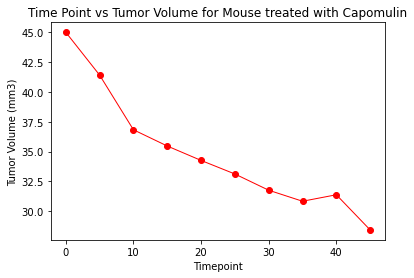

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# First, creates dataframe for a mouse treated with Capomulin.
line_df = mouse_study_merged.loc[mouse_study_merged["Mouse ID"] == 'm601']
timepoint_m601 = line_df["Timepoint"].to_list()
tumor_vol_m601 = line_df["Tumor Volume (mm3)"].to_list()
plt.plot(timepoint_m601, tumor_vol_m601, marker="o", color="Red", linewidth=1)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Point vs Tumor Volume for Mouse treated with Capomulin")